In [1]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics.SIModel as si
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
import json

from ndlib.utils import multi_runs
import warnings
warnings.filterwarnings("ignore")

# Network topology
#G = nx.karate_club_graph()
fh=open("Power.txt", 'rb')
G = nx.read_weighted_edgelist(fh,nodetype=None, encoding='utf-8')
fh.close()
g = nx.convert_node_labels_to_integers(G, first_label=0, ordering="default", label_attribute = None)

# Model selection
model = si.SIModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.05)


infected_nodes1 = [4326]
cfg.add_model_initial_configuration("Infected", infected_nodes1)
model.set_initial_status(cfg)

# Simulation execution
#iterations = model.iteration_bunch(100)
#trends1 = model.build_trends(iterations)
trends1 = multi_runs(model, execution_number=10, iteration_number=500, nprocesses=4)


# 2° Model selection
model1 = si.SIModel(g)

# 2° Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.05)

infected_nodes2 = [2681]
cfg.add_model_initial_configuration("Infected", infected_nodes2)
model1.set_initial_status(cfg)

# 3° Simulation execution
#iterations = model1.iteration_bunch(100)
#trends2 = model1.build_trends(iterations)
trends2  = multi_runs(model1, execution_number=10, iteration_number=500, nprocesses=4)


# 3° Model selection
model2 = si.SIModel(g)

# 3° Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.05)

infected_nodes3 = [2543]
cfg.add_model_initial_configuration("Infected", infected_nodes3)
model2.set_initial_status(cfg)

# 3° Simulation execution
#iterations = model2.iteration_bunch(100)
#trends3 = model2.build_trends(iterations)
trends3 = multi_runs(model2, execution_number=10, iteration_number=500, nprocesses=4)

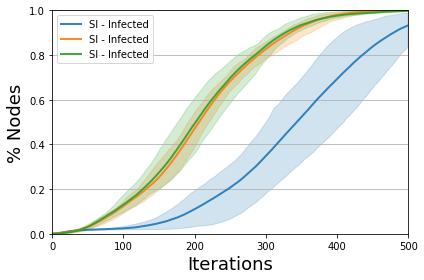

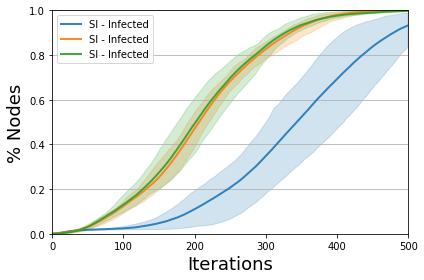

In [2]:
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
viz = DiffusionTrendComparison([model, model1, model2], [trends1, trends2,trends3], statuses=['Infected'])
viz.plot(percentile=90)
#viz.plot("32_75_1312.png",percentile=90)

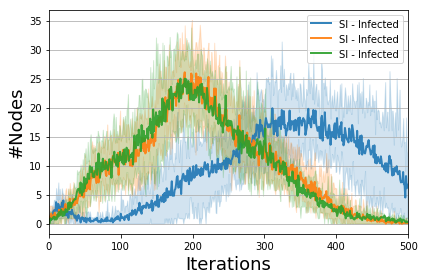

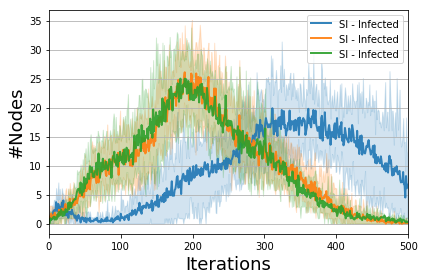

In [3]:
from ndlib.viz.mpl.PrevalenceComparison import DiffusionPrevalenceComparison
viz = DiffusionPrevalenceComparison([model, model1, model2], [trends1, trends2,trends3], statuses=['Infected'])
viz.plot(percentile=90)
#viz.plot("32_75_1312p.png",percentile=90)

In [4]:
#"KCPrevalence_comparison.png"